In [11]:
# Importing necessary libraries
from astropy.table import Table
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
import seaborn as sns


In [12]:
# Reading the data
dft = Table.read('ngvs_matched.fits')


In [13]:
print(dft.columns)

<TableColumns names=('ngvsID','x_sex','y_sex','ra_in','dec_in','elongation','umag','gmag','rmag','imag','zmag','ksmag','uerr','gerr','rerr','ierr','zerr','kserr','iC','iCerr','ebv','flags','field','background_g','ug0','gi0','iz0','ik0','p_star','p_gc','p_galx','main_id','ra_cds','dec_cds','coo_err_maj','coo_err_min','coo_err_angle','nbref','ra_sexa','dec_sexa','coo_qual','coo_bibcode','main_type','other_types','radvel','radvel_err','redshift','redshift_err','sp_type','morph_type','plx','plx_err','pmra','pmdec','pm_err_maj','pm_err_min','pm_err_pa','size_maj','size_min','size_angle','B','V','R_cds','J','H','K','u','g','r_cdsa','i','z','angDist')>


In [14]:
dft = dft[['ngvsID','x_sex','y_sex','ra_in','dec_in','elongation','umag','gmag','rmag','imag','zmag','ksmag','uerr'
           ,'gerr','rerr','ierr','zerr','kserr','iC','iCerr','ebv',  
           'field','background_g','ug0','gi0','iz0','ik0','p_star','p_gc','p_galx',
'main_type','other_types']].to_pandas()


In [15]:
dft = dft.drop(columns=['ngvsID','field'])

In [16]:
dft.head()

,x_sex,y_sex,ra_in,dec_in,elongation,umag,gmag,rmag,imag,zmag,...,background_g,ug0,gi0,iz0,ik0,p_star,p_gc,p_galx,main_type,other_types
0,19736.2,15060.5,181.690775,13.184485,0.0,35.000000,24.950600,99.0,25.932199,21.135799,...,0.090464,10.026175,-1.021175,4.784325,99.0,5.657040e-01,3.707125e-23,0.434296,NaN,NaN
1,19733.1,12350.7,181.691223,13.044654,0.0,24.132299,23.497400,99.0,22.803200,22.702600,...,0.226451,0.610746,0.653042,0.088042,99.0,3.812974e-06,4.419344e-03,0.995577,NaN,NaN
2,19723.0,17315.3,181.691234,13.300834,0.0,24.999500,24.631201,99.0,23.638500,22.843901,...,0.062369,0.345075,0.953125,0.782525,99.0,3.343125e-08,1.746328e-04,0.999825,NaN,NaN
3,19731.0,12507.2,181.691317,13.052732,0.0,24.627399,23.912701,99.0,23.628300,22.960899,...,-0.081988,0.690546,0.243242,0.654842,99.0,1.545674e-04,6.319930e-04,0.999213,NaN,NaN
4,19727.1,14377.7,181.691329,13.149254,0.0,20.023199,18.309601,99.0,17.076799,16.884600,...,3.120640,1.690375,1.193225,0.180125,99.0,8.395232e-14,4.673958e-07,1.000000,NaN,NaN


In [17]:
from sklearn.preprocessing import MinMaxScaler
def scale_numeric_columns(df):
    # Identify non-numeric and numeric columns
    non_numeric_columns = df.select_dtypes(include=['object']).columns
    numeric_columns = df.select_dtypes(exclude=['object']).columns

    # Separate non-numeric and numeric columns
    df_non_numeric = df[non_numeric_columns]
    df_numeric = df[numeric_columns]

    # Handle missing values in numeric columns
    df_numeric = df_numeric.dropna()
    # Alternatively, fill missing values
    # df_numeric = df_numeric.fillna(df_numeric.mean())

    # Scale the numeric columns
    scaler = MinMaxScaler()
    df_numeric_scaled = scaler.fit_transform(df_numeric)

    # Convert the scaled array back to a DataFrame
    df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns=numeric_columns)

    # Combine the scaled numeric columns with the non-numeric columns
    df_scaled = pd.concat([df_numeric_scaled, df_non_numeric.reset_index(drop=True)], axis=1)

    return df_scaled

# Example usage
# df = pd.read_csv('your_dataset.csv')  # Load your dataset
dft = scale_numeric_columns(dft)
print("Combined scaled data:", dft.head())


Combined scaled data:       x_sex     y_sex     ra_in    dec_in  elongation      umag      gmag  \
0  0.998368  0.708095  0.000000  0.623154         0.0  0.863033  0.992943   
1  0.998207  0.576234  0.000038  0.612717         0.0  0.310894  0.785337   
2  0.997682  0.817815  0.000039  0.631838         0.0  0.354953  0.947313   
3  0.998098  0.583849  0.000046  0.613320         0.0  0.336048  0.844667   
4  0.997895  0.674869  0.000047  0.620524         0.0  0.102129  0.044201   

   rmag      imag      zmag  ...  background_g       ug0       gi0       iz0  \
0   1.0  0.994483  0.390897  ...      0.023809  0.683676  0.007317  0.880966   
1   1.0  0.674227  0.498713  ...      0.024025  0.045185  0.340687  0.592612   
2   1.0  0.759721  0.508436  ...      0.023764  0.027169  0.400440  0.635253   
3   1.0  0.758677  0.516487  ...      0.023535  0.050597  0.259088  0.627413   
4   1.0  0.088124  0.098361  ...      0.028622  0.118398  0.448248  0.598266   

   ik0        p_star          p_gc

In [18]:
dft.shape

(4496783, 30)

In [19]:
dft.head()

,x_sex,y_sex,ra_in,dec_in,elongation,umag,gmag,rmag,imag,zmag,...,background_g,ug0,gi0,iz0,ik0,p_star,p_gc,p_galx,main_type,other_types
0,0.998368,0.708095,0.000000,0.623154,0.0,0.863033,0.992943,1.0,0.994483,0.390897,...,0.023809,0.683676,0.007317,0.880966,0.0,5.658205e-01,3.708887e-23,0.434179,NaN,NaN
1,0.998207,0.576234,0.000038,0.612717,0.0,0.310894,0.785337,1.0,0.674227,0.498713,...,0.024025,0.045185,0.340687,0.592612,0.0,3.813759e-06,4.421443e-03,0.995576,NaN,NaN
2,0.997682,0.817815,0.000039,0.631838,0.0,0.354953,0.947313,1.0,0.759721,0.508436,...,0.023764,0.027169,0.400440,0.635253,0.0,3.343814e-08,1.747157e-04,0.999825,NaN,NaN
3,0.998098,0.583849,0.000046,0.613320,0.0,0.336048,0.844667,1.0,0.758677,0.516487,...,0.023535,0.050597,0.259088,0.627413,0.0,1.545993e-04,6.322933e-04,0.999213,NaN,NaN
4,0.997895,0.674869,0.000047,0.620524,0.0,0.102129,0.044201,1.0,0.088124,0.098361,...,0.028622,0.118398,0.448248,0.598266,0.0,8.396960e-14,4.676178e-07,1.000000,NaN,NaN


In [20]:
dft_cleaned = dft.dropna(subset=['main_type', 'other_types'])

In [21]:
dft_cleaned.shape

(23399, 30)

In [22]:
dft = dft_cleaned.copy()

In [23]:
dft.head()

,x_sex,y_sex,ra_in,dec_in,elongation,umag,gmag,rmag,imag,zmag,...,background_g,ug0,gi0,iz0,ik0,p_star,p_gc,p_galx,main_type,other_types
50,0.995489,0.696372,0.000252,0.622226,0.0,0.211651,0.501186,1.0,0.516862,0.413337,...,0.024417,0.047662,0.251099,0.574418,0.0,6.209475e-04,6.833365e-18,0.999379,b'WD*',b'Opt|WD*'
110,0.992901,0.835542,0.000451,0.633242,0.0,0.131017,0.197048,1.0,0.236809,0.205241,...,0.024388,0.084403,0.372025,0.592095,0.0,7.011663e-02,8.091432e-01,0.120958,b'Star',b'*'
223,0.990443,0.271943,0.000766,0.588635,0.0,0.122746,0.341667,1.0,0.424317,0.327025,...,0.024025,0.004590,0.208176,0.595855,0.0,7.739303e-12,1.796131e-30,1.000000,b'QSO',b'*|Opt|QSO'
965,0.972255,0.642515,0.002276,0.617967,0.0,0.306479,0.758350,1.0,0.536903,0.372676,...,0.025157,0.052102,0.570233,0.622692,0.0,0.000000e+00,0.000000e+00,1.000000,b'Radio',b'Rad'
1087,0.994071,0.058725,0.002431,0.500881,0.0,0.100173,0.201420,1.0,0.326019,0.270179,...,0.024775,0.040970,0.203619,0.587579,0.0,6.028467e-29,0.000000e+00,1.000000,b'Star',b'*|blu'


In [24]:
pd.set_option('display.max_columns', None)
dft.describe()

,x_sex,y_sex,ra_in,dec_in,elongation,umag,gmag,rmag,imag,zmag,ksmag,uerr,gerr,rerr,ierr,zerr,kserr,iC,iCerr,ebv,background_g,ug0,gi0,iz0,ik0,p_star,p_gc,p_galx
count,23399.000000,23399.000000,23399.000000,23399.000000,23399.0,23399.000000,23399.000000,23399.000000,23399.000000,23399.000000,23399.0,23399.000000,23399.000000,23399.000000,23399.000000,23399.000000,23399.0,23399.000000,23399.000000,23399.000000,23399.000000,23399.000000,23399.000000,23399.000000,23399.0,2.339900e+04,2.339900e+04,23399.000000
mean,0.510075,0.507988,0.515484,0.500512,0.0,0.251023,0.535440,0.892025,0.461896,0.349785,0.0,0.005045,0.049729,0.000035,0.010669,0.000281,0.0,0.539553,0.006985,0.229921,0.036878,0.083808,0.405041,0.598080,0.0,7.868285e-02,2.658509e-01,0.655538
std,0.287401,0.274697,0.193875,0.223727,0.0,0.102431,0.241533,0.300463,0.159220,0.107721,0.0,0.050289,0.068081,0.000101,0.017805,0.000553,0.0,0.239940,0.012369,0.119480,0.039983,0.053868,0.144466,0.011960,0.0,2.288483e-01,4.039498e-01,0.431930
min,0.003133,0.002420,0.000252,0.000157,0.0,0.000000,0.000114,0.004491,0.014483,0.002808,0.0,0.000038,0.000000,0.000000,0.000000,0.000003,0.0,0.000500,0.000006,0.000000,0.021155,0.000205,0.004423,0.442712,0.0,0.000000e+00,0.000000e+00,0.000042
25%,0.243831,0.271885,0.387900,0.316994,0.0,0.179374,0.369453,1.000000,0.362614,0.282156,0.0,0.000285,0.007366,0.000000,0.001772,0.000046,0.0,0.345333,0.001067,0.137931,0.023911,0.053747,0.323586,0.591214,0.0,5.150832e-43,0.000000e+00,0.107456
50%,0.530733,0.498562,0.503608,0.542858,0.0,0.264737,0.559587,1.000000,0.460713,0.347016,0.0,0.001058,0.022713,0.000000,0.004017,0.000102,0.0,0.431000,0.002403,0.206897,0.024557,0.077839,0.370072,0.597028,0.0,4.656053e-08,6.781889e-13,0.999903
75%,0.774541,0.768967,0.640969,0.638428,0.0,0.327061,0.720714,1.000000,0.568621,0.422066,0.0,0.003142,0.062615,0.000020,0.010514,0.000271,0.0,0.782667,0.006741,0.293103,0.028495,0.112961,0.486571,0.605332,0.0,1.442370e-03,6.663039e-01,1.000000
max,0.997100,0.989324,0.999542,0.999887,0.0,0.863033,0.999900,1.000000,0.912971,0.778657,0.0,1.000000,0.628606,0.002012,0.340461,0.032211,0.0,1.000000,0.273861,0.982759,1.000000,0.968051,0.998610,0.808801,0.0,9.999580e-01,9.999233e-01,1.000000


In [25]:
dft['main_type'].value_counts()

b'GlCl'               4568
b'GlCl?_Candidate'    3381
b'Galaxy'             3346
b'QSO'                3264
b'GinCl'              2980
                      ... 
b'ULX'                   1
b'Eruptive*'             1
b'ClG_Candidate'         1
b'LensedG'               1
b'C*'                    1
Name: main_type, Length: 76, dtype: int64

In [26]:
# Setting the max rows option to display all rows
pd.set_option('display.max_rows', None)
dft['main_type'].value_counts()

b'GlCl'                 4568
b'GlCl?_Candidate'      3381
b'Galaxy'               3346
b'QSO'                  3264
b'GinCl'                2980
b'Star'                 2742
b'WD*_Candidate'         445
b'BClG'                  383
b'X'                     359
b'Radio'                 271
b'LSB_G'                 209
b'low-mass*'             199
b'WD*'                   162
b'RRLyr'                 142
b'Seyfert_1'             127
b'AGN_Candidate'         119
b'XB'                    103
b'ClG'                    95
b'HII'                    64
b'Blue'                   63
b'HB*'                    38
b'RGB*'                   28
b'PN?_Candidate'          26
b'QSO_Candidate'          25
b'EB*'                    22
b'brownD*_Candidate'      16
b'PulsV*delSct'           16
b'PM*'                    14
b'GinGroup'               13
b'PN'                     12
b'G_Candidate'            11
b'Pec*'                   11
b'Compact_Gr_G'            9
b'AGN'                     9
b'BLLac'      

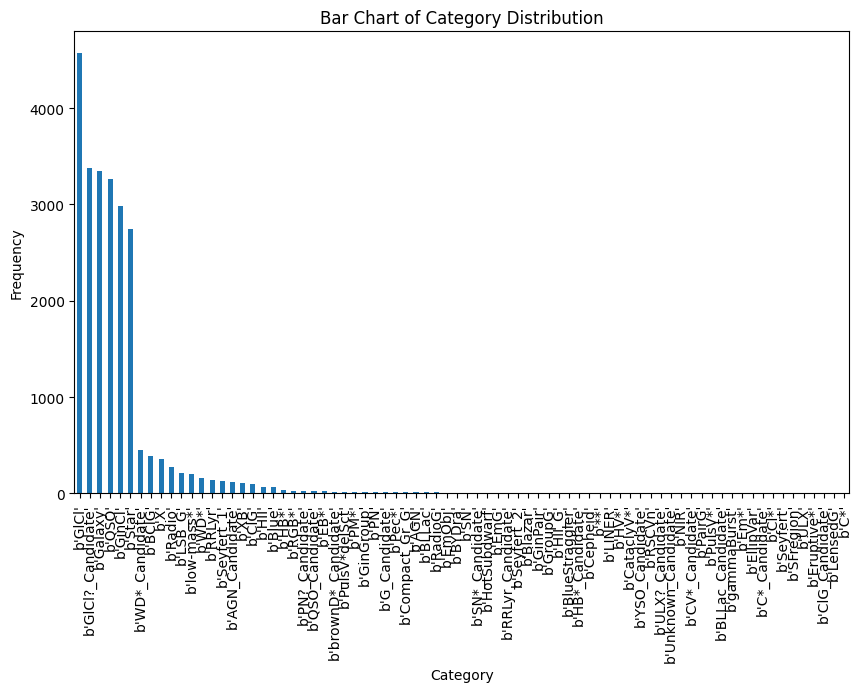

In [27]:
# Create and display the pie chart of the new column
category_counts = dft['main_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Bar Chart of Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

The number of different categories in the new grouped column: 10


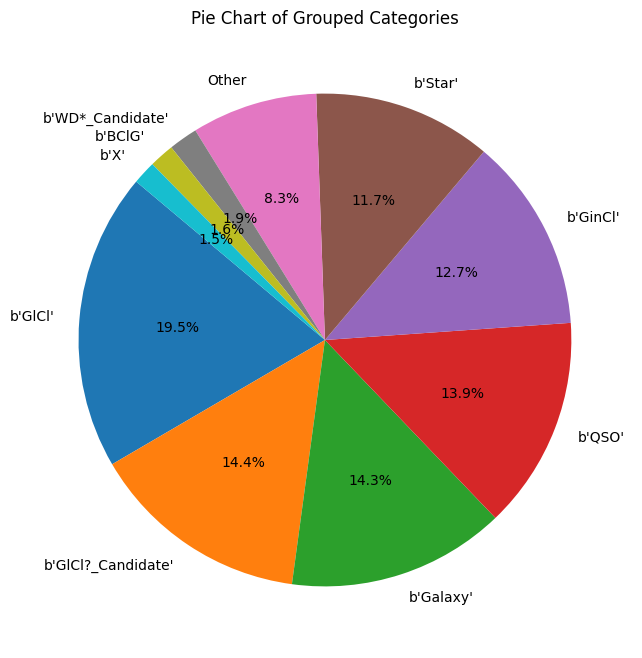

In [28]:
# Count the occurrences of each category
category_counts = dft['main_type'].value_counts()

# Specify the categorical column
category_column = 'main_type'

# Define the threshold for rare categories
threshold = 300  # Categories with counts less than or equal to this will be grouped into "Other"

# Count the occurrences of each category
category_counts = dft[category_column].value_counts()

# Identify the rare categories
rare_categories = category_counts[category_counts <= threshold].index

# Create a new column with grouped categories
dft['grouped_category'] = dft[category_column].apply(lambda x: 'Other' if x in rare_categories else x)

# Print the number of different categories in the new column
num_categories = dft['grouped_category'].nunique()
print(f'The number of different categories in the new grouped column: {num_categories}')

# Save or display the modified dataset
dft.to_csv('modified_data.csv', index=False)


# Count the occurrences of each category
category_counts = dft['grouped_category'].value_counts()


# Create and display the pie chart of the new column
category_counts = dft['grouped_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Grouped Categories')
plt.show()

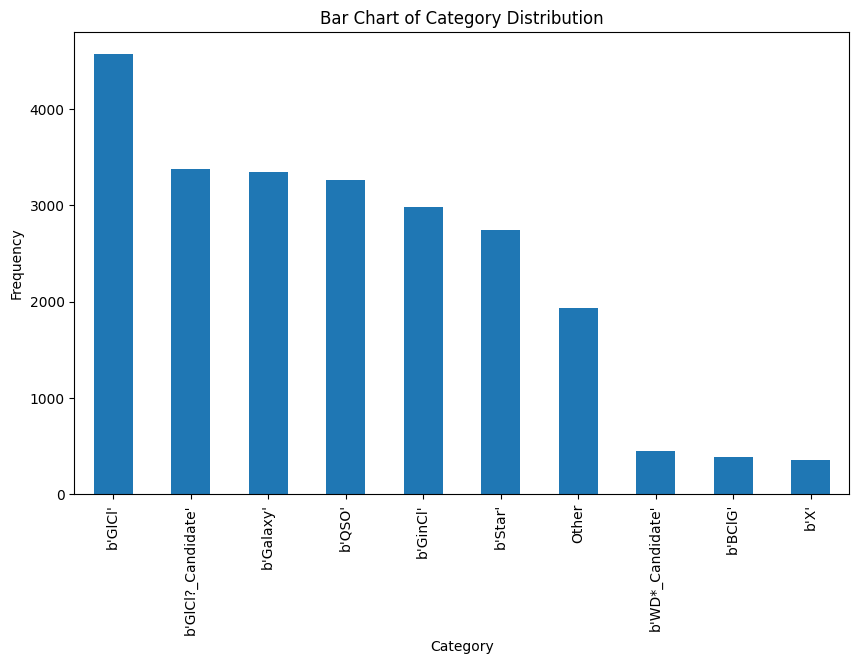

In [29]:
# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Bar Chart of Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [30]:
dft.head()

,x_sex,y_sex,ra_in,dec_in,elongation,umag,gmag,rmag,imag,zmag,ksmag,uerr,gerr,rerr,ierr,zerr,kserr,iC,iCerr,ebv,background_g,ug0,gi0,iz0,ik0,p_star,p_gc,p_galx,main_type,other_types,grouped_category
50,0.995489,0.696372,0.000252,0.622226,0.0,0.211651,0.501186,1.0,0.516862,0.413337,0.0,0.000510,0.036832,0.0,0.008387,0.000496,0.0,0.429833,0.006224,0.189655,0.024417,0.047662,0.251099,0.574418,0.0,6.209475e-04,6.833365e-18,0.999379,b'WD*',b'Opt|WD*',Other
110,0.992901,0.835542,0.000451,0.633242,0.0,0.131017,0.197048,1.0,0.236809,0.205241,0.0,0.000195,0.005525,0.0,0.001063,0.000035,0.0,0.327667,0.000871,0.189655,0.024388,0.084403,0.372025,0.592095,0.0,7.011663e-02,8.091432e-01,0.120958,b'Star',b'*',b'Star'
223,0.990443,0.271943,0.000766,0.588635,0.0,0.122746,0.341667,1.0,0.424317,0.327025,0.0,0.000180,0.009208,0.0,0.002953,0.000151,0.0,0.405000,0.002178,0.224138,0.024025,0.004590,0.208176,0.595855,0.0,7.739303e-12,1.796131e-30,1.000000,b'QSO',b'*|Opt|QSO',b'QSO'
965,0.972255,0.642515,0.002276,0.617967,0.0,0.306479,0.758350,1.0,0.536903,0.372676,0.0,0.001620,0.073051,0.0,0.006497,0.000145,0.0,0.791333,0.003656,0.206897,0.025157,0.052102,0.570233,0.622692,0.0,0.000000e+00,0.000000e+00,1.000000,b'Radio',b'Rad',Other
1087,0.994071,0.058725,0.002431,0.500881,0.0,0.100173,0.201420,1.0,0.326019,0.270179,0.0,0.000135,0.008594,0.0,0.002835,0.000072,0.0,0.656167,0.001539,0.241379,0.024775,0.040970,0.203619,0.587579,0.0,6.028467e-29,0.000000e+00,1.000000,b'Star',b'*|blu',b'Star'


In [31]:
dft['grouped_category'].value_counts()

b'GlCl'               4568
b'GlCl?_Candidate'    3381
b'Galaxy'             3346
b'QSO'                3264
b'GinCl'              2980
b'Star'               2742
Other                 1931
b'WD*_Candidate'       445
b'BClG'                383
b'X'                   359
Name: grouped_category, dtype: int64

In [32]:
dft = dft.drop(columns='main_type')

In [33]:
# Get the unique types in the 'grouped_category' column
unique_types = dft['grouped_category'].apply(type).unique()
print("Different types in 'grouped_category' column:", unique_types)

Different types in 'grouped_category' column: [<class 'str'> <class 'bytes'>]


In [34]:
# Ensure all values in 'grouped_category' are strings
dft['grouped_category'] = dft['grouped_category'].astype(str)

In [35]:
df = dft.copy()

In [36]:
df = df.drop(columns=[ 'elongation','ik0' , 'ksmag', 'kserr', 'rmag', 'rerr', 'p_galx', 'p_star', 'p_gc'])

In [37]:
# Save the train and test datasets to CSV files
df.to_csv('modified_dataset.csv', index=False)




In [ ]:
#############LOading
###########
#######
#########
#########


In [38]:
# If you want to load the data later, you can use the following code
df = pd.read_csv('modified_dataset.csv')


In [39]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()
df['main_type_encoded'] = label_encoder.fit_transform(df['grouped_category'])

/tmp/ipykernel_106170/3090682606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


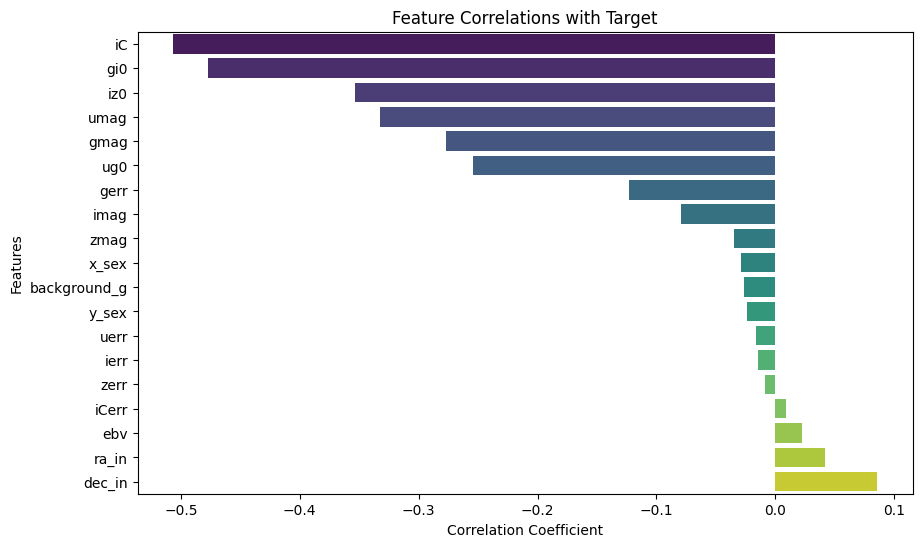

In [40]:
 # Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlations of the features with the target
correlation_with_target = correlation_matrix['main_type_encoded'].drop('main_type_encoded')


# Sort correlations
sorted_correlations = correlation_with_target.sort_values()

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

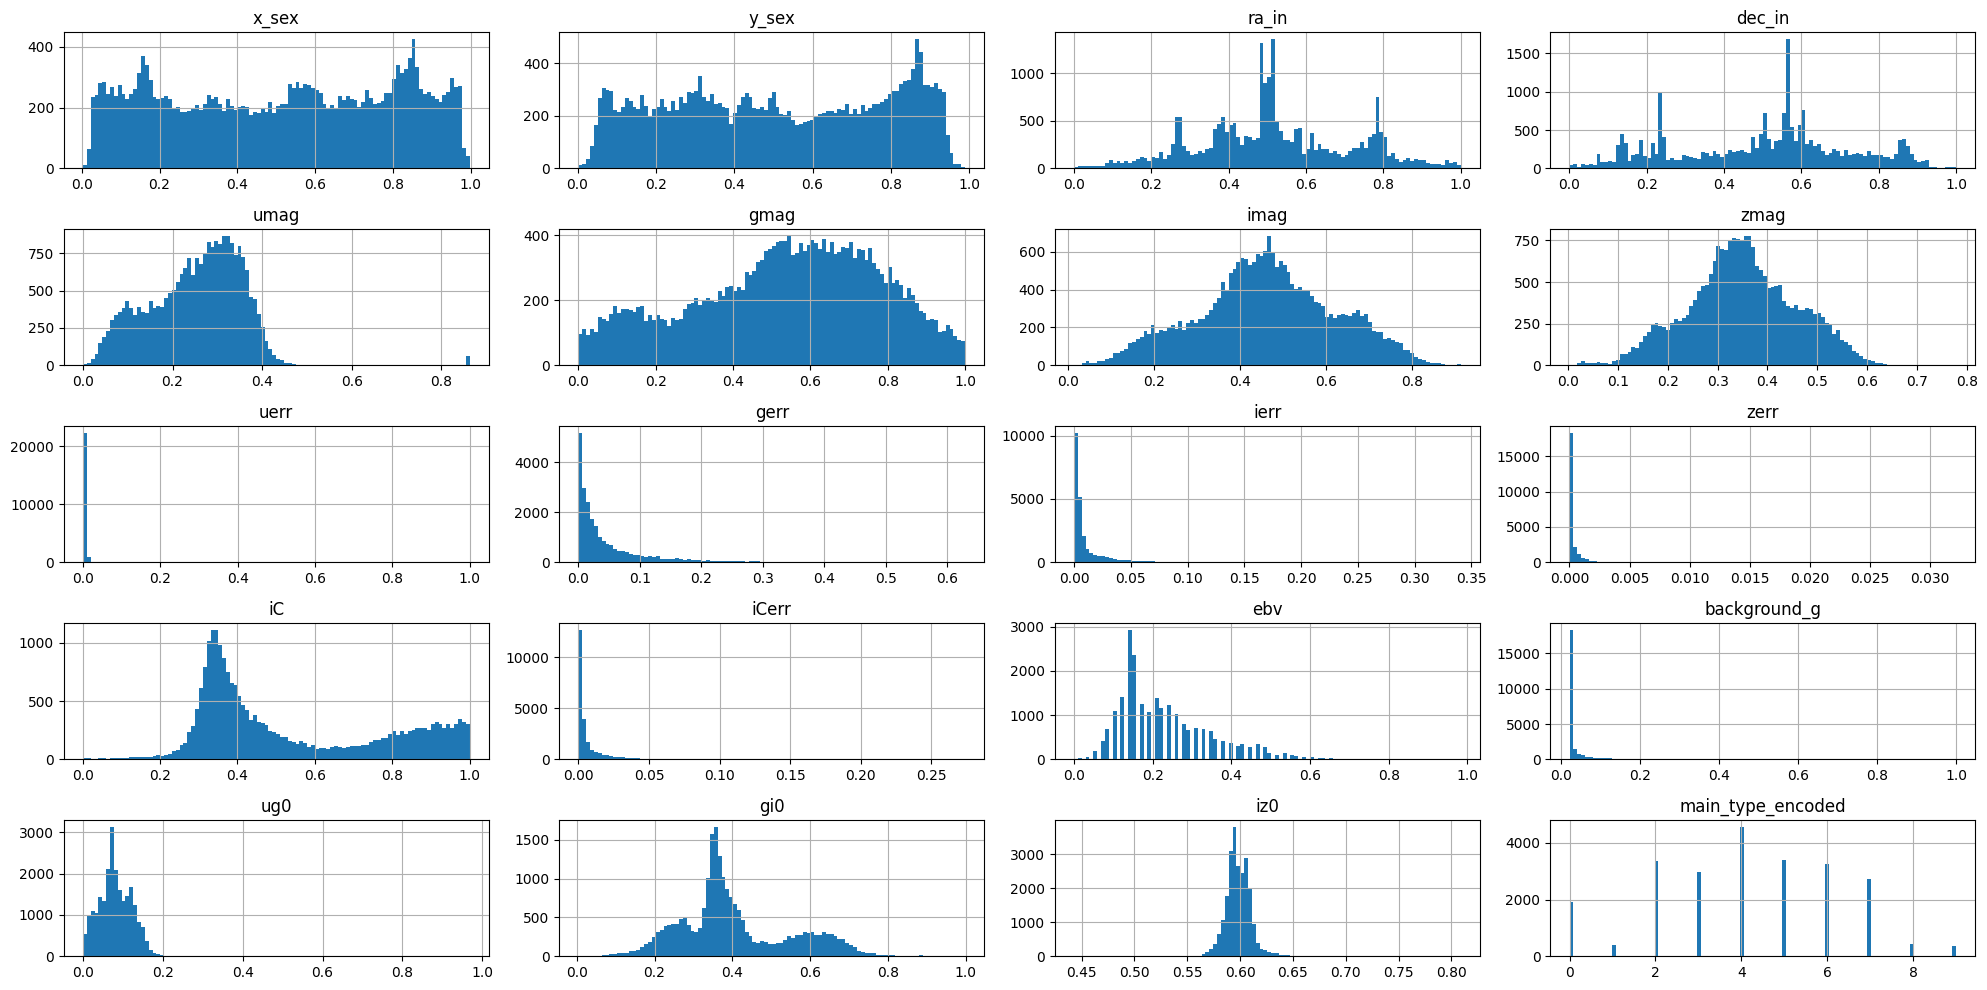

In [41]:
df.hist(bins=100, figsize=(20, 10 ))
plt.tight_layout()
plt.show()

In [42]:
df.shape

(23399, 22)

<Axes: >

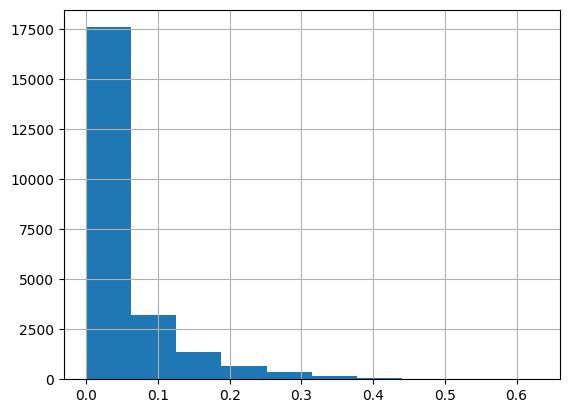

In [43]:
df['gerr'].hist()

In [44]:
df = df.drop(columns = ['other_types','grouped_category'])

In [45]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['main_type_encoded'], random_state=42)
# Separate X and y for training and testing
X_train = train_df.drop(columns=['main_type_encoded'])
y_train = train_df['main_type_encoded']
X_test = test_df.drop(columns=['main_type_encoded'])
y_test = test_df['main_type_encoded']

In [46]:
X_train.head()

,x_sex,y_sex,ra_in,dec_in,umag,gmag,imag,zmag,uerr,gerr,ierr,zerr,iC,iCerr,ebv,background_g,ug0,gi0,iz0
18330,0.787432,0.635970,0.683885,0.901159,0.100006,0.183877,0.289971,0.245104,0.000105,0.002455,0.000945,0.000032,0.475167,0.000644,0.172414,0.024168,0.049326,0.250558,0.588447
21591,0.406141,0.611936,0.799415,0.757050,0.246442,0.548344,0.400018,0.295213,0.000683,0.020872,0.002363,0.000057,0.993333,0.001120,0.172414,0.024236,0.071779,0.544460,0.609753
14551,0.529273,0.304369,0.537875,0.449449,0.323956,0.816466,0.669263,0.492052,0.002843,0.086556,0.021973,0.000612,0.624333,0.012961,0.465517,0.023812,0.046898,0.389004,0.595132
4603,0.697559,0.908756,0.361566,0.071896,0.322021,0.582431,0.344995,0.238753,0.002790,0.022713,0.001418,0.000024,0.353833,0.001075,0.189655,0.023937,0.156414,0.698702,0.627093
14206,0.631602,0.840880,0.529148,0.420954,0.055657,0.137032,0.251855,0.210271,0.000068,0.001842,0.000709,0.000021,0.376667,0.000528,0.275862,0.024039,0.011989,0.257528,0.596484


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.33      0.44       386
           1       0.48      0.14      0.22        77
           2       0.74      0.68      0.71       669
           3       0.74      0.90      0.81       596
           4       0.79      0.89      0.84       914
           5       0.80      0.79      0.79       676
           6       0.76      0.90      0.83       653
           7       0.80      0.83      0.81       548
           8       0.70      0.47      0.56        89
           9       0.71      0.07      0.13        72

    accuracy                           0.76      4680
   macro avg       0.71      0.60      0.61      4680
weighted avg       0.75      0.76      0.75      4680

Label Mapping: {'Other': 0, "b'BClG'": 1, "b'Galaxy'": 2, "b'GinCl'": 3, "b'GlCl'": 4, "b'GlCl?_Candidate'": 5, "b'QSO'": 6, "b'Star'": 7, "b'WD*_Candidate'": 8, "b'X'": 9}
['Other', "b'BClG'", "b'Galaxy

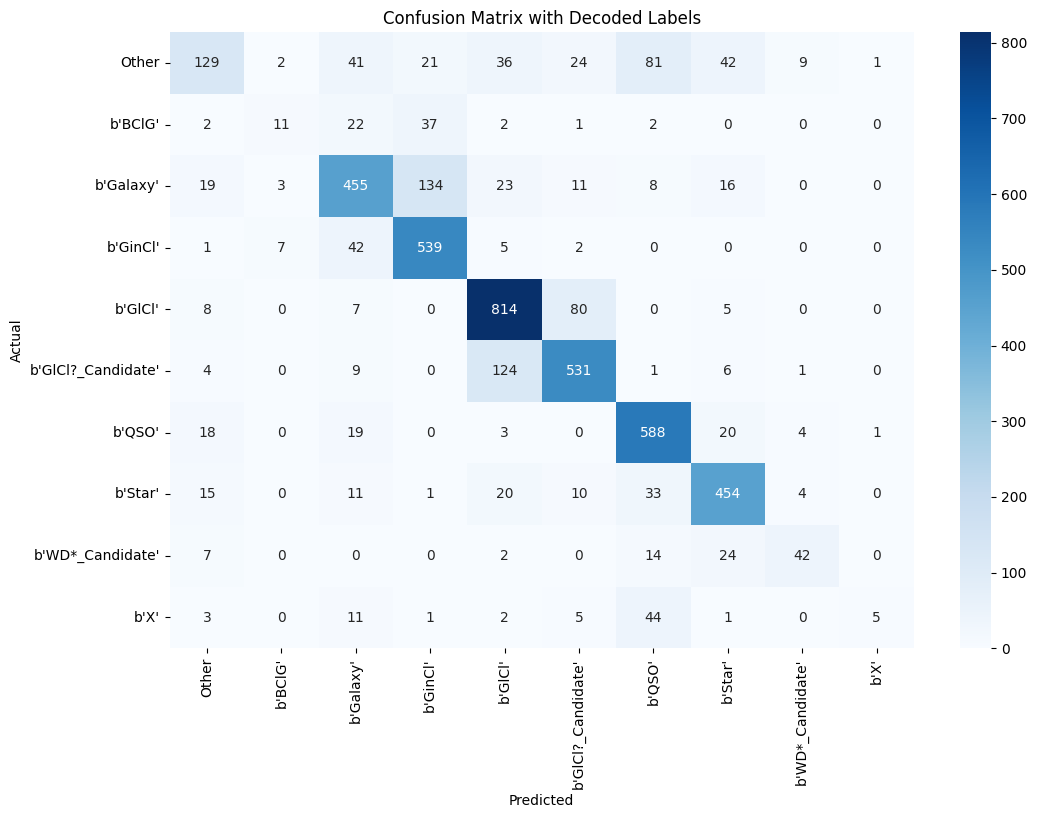

Model saved to random_forest_model.pkl


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Decode the labels using the dictionary
decoded_labels = [key for key in sorted(label_mapping, key=label_mapping.get)]
print(decoded_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_classifier, model_filename)
print(f'Model saved to {model_filename}')

In [48]:
# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Other': 0, "b'BClG'": 1, "b'Galaxy'": 2, "b'GinCl'": 3, "b'GlCl'": 4, "b'GlCl?_Candidate'": 5, "b'QSO'": 6, "b'Star'": 7, "b'WD*_Candidate'": 8, "b'X'": 9}


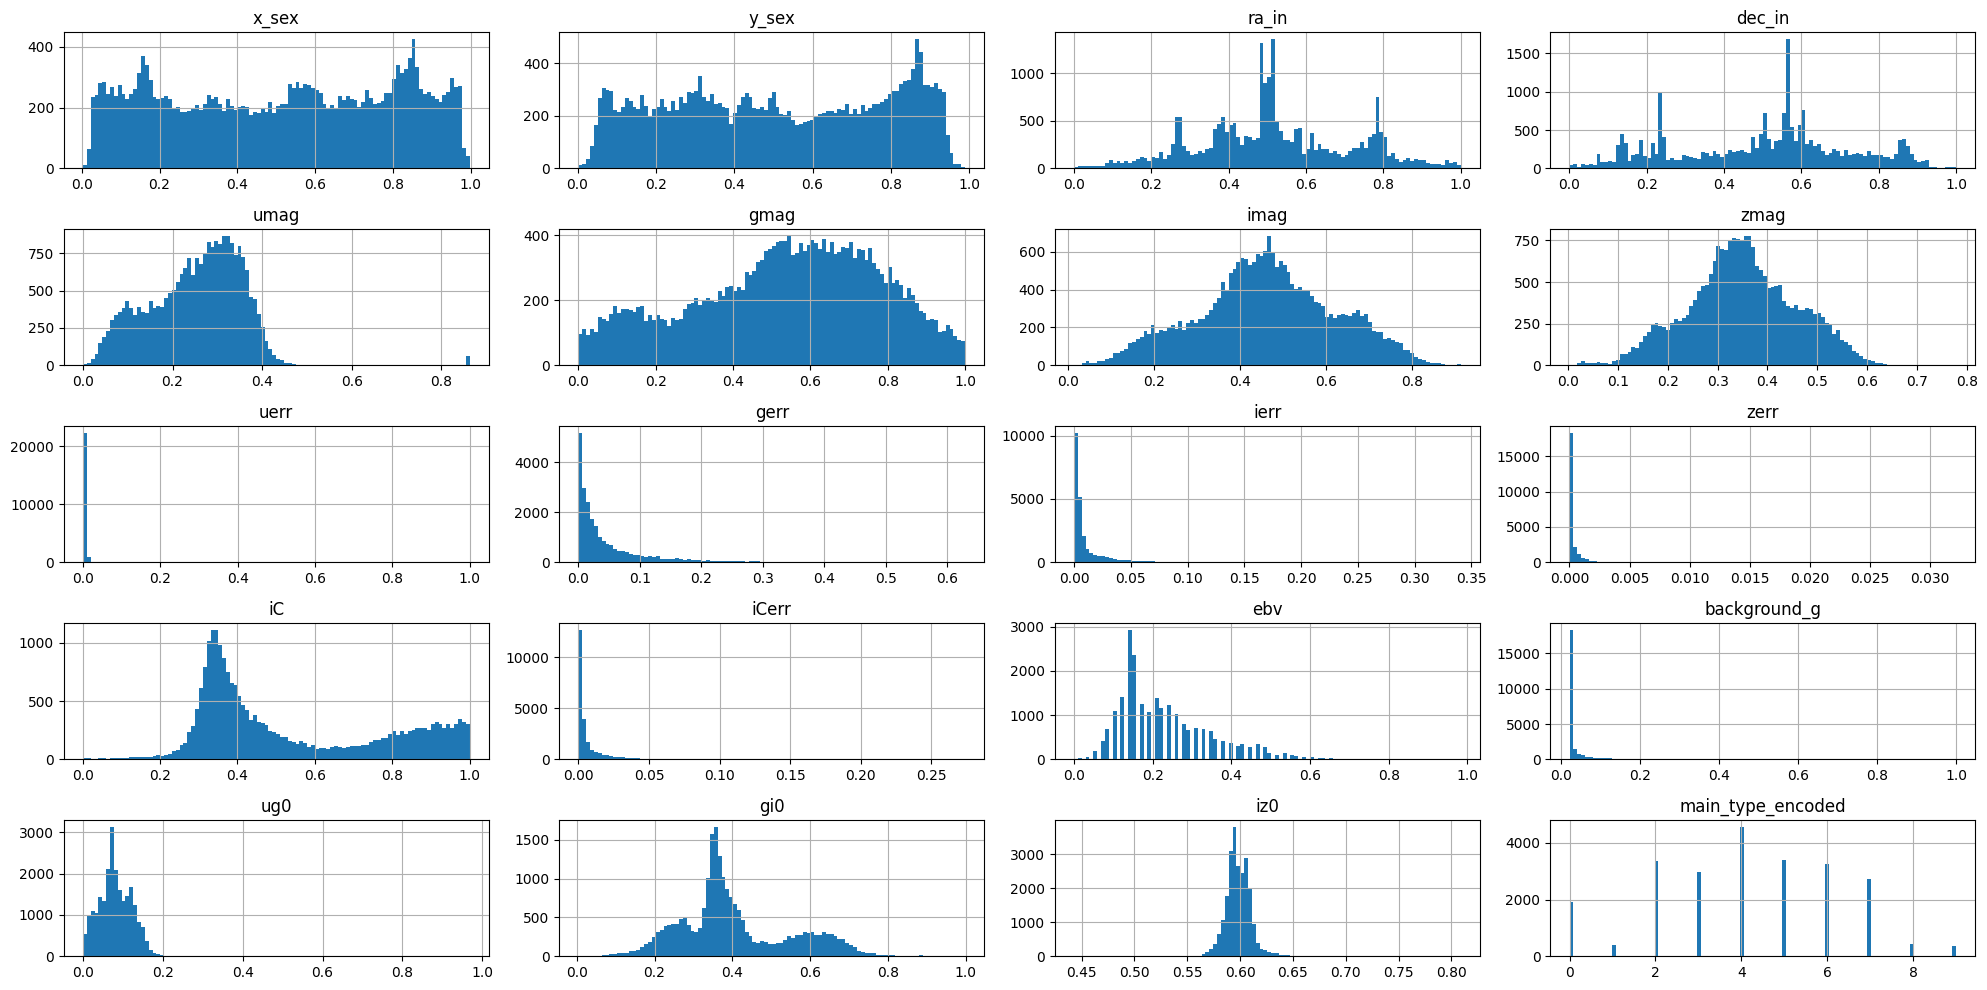

In [49]:
df.hist(bins=100, figsize=(20, 10 ))
plt.tight_layout()
plt.show()

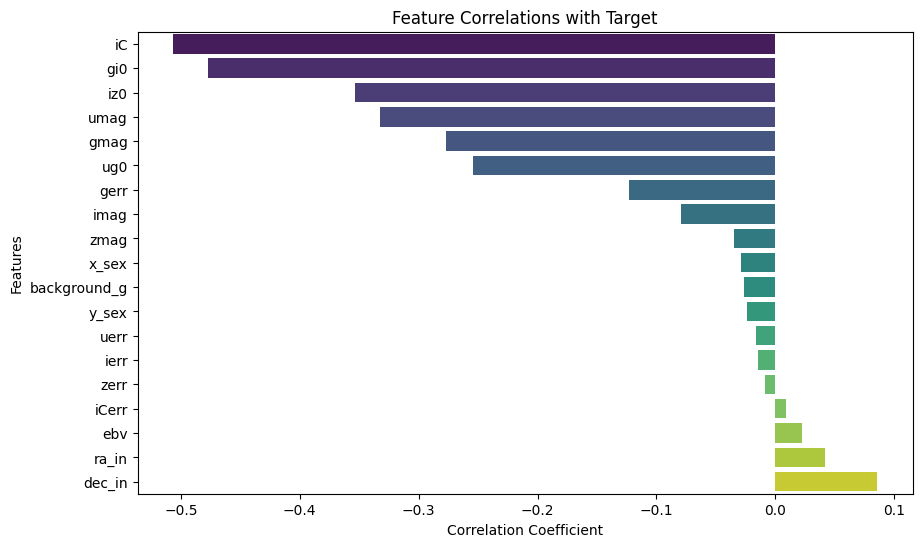

In [50]:
 # Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlations of the features with the target
correlation_with_target = correlation_matrix['main_type_encoded'].drop('main_type_encoded')


# Sort correlations
sorted_correlations = correlation_with_target.sort_values()

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

<Axes: >

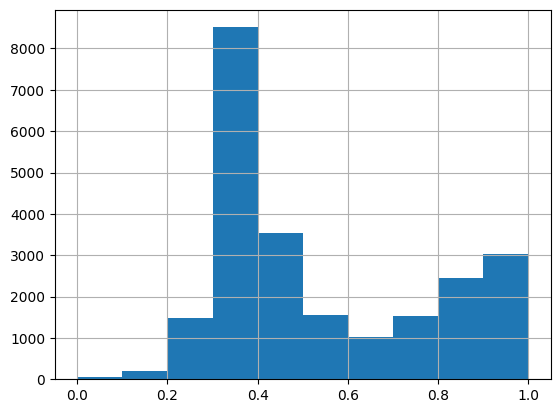

In [51]:
df['iC'].hist()

In [52]:
df.columns

Index(['x_sex', 'y_sex', 'ra_in', 'dec_in', 'umag', 'gmag', 'imag', 'zmag',
       'uerr', 'gerr', 'ierr', 'zerr', 'iC', 'iCerr', 'ebv', 'background_g',
       'ug0', 'gi0', 'iz0', 'main_type_encoded'],
      dtype='object')

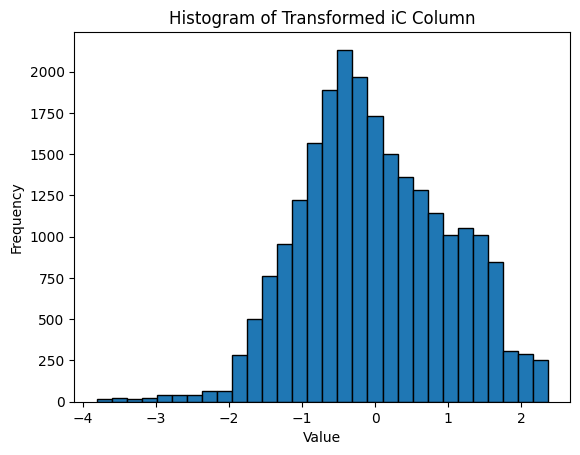

In [53]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, zscore
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt



# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(df[['iC']])  # Using double square brackets to keep it as a 2D array
labels = gmm.predict(df[['iC']])
df['mode_label'] = labels

# Apply transformations to each mode separately
transformed_columns = []
for label in np.unique(labels):
    mode_data = df[df['mode_label'] == label]['iC']
    
    # Apply a Box-Cox transformation (as an example)
    mode_data_transformed, _ = boxcox(mode_data - mode_data.min() + 1)  # Ensure positivity for Box-Cox
    
    # Normalize the transformed data to zero mean and unit variance
    mode_data_normalized = zscore(mode_data_transformed)
    
    # Store transformed and normalized data
    transformed_columns.append(pd.Series(mode_data_normalized, index=mode_data.index))

# Concatenate the transformed columns back into a single series
transformed_data = pd.concat(transformed_columns).sort_index()

# Plot the transformed data
plt.hist(transformed_data, bins=30, edgecolor='k')
plt.title('Histogram of Transformed iC Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Add the transformed data back to the DataFrame
df['transformed_iC'] = transformed_data

# # Display the DataFrame
# print(df.head())

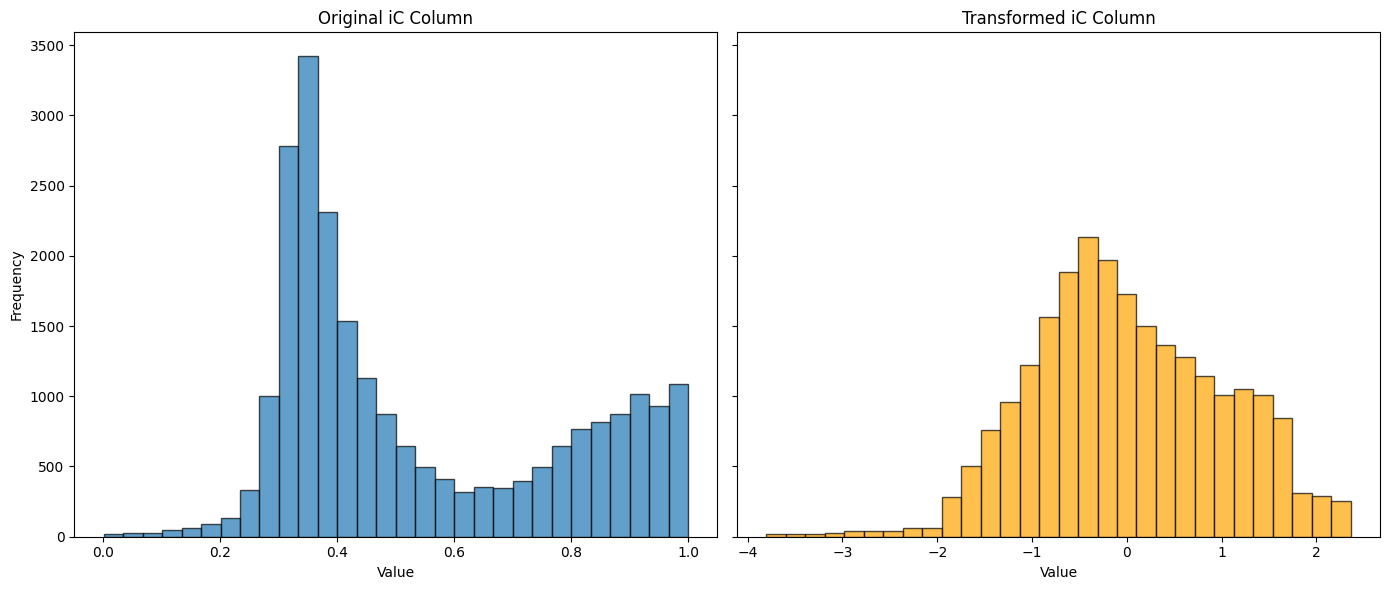

In [54]:

# Plot the original and transformed data histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Original column histogram
axes[0].hist(df['iC'], bins=30, edgecolor='k', alpha=0.7)
axes[0].set_title('Original iC Column')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Transformed column histogram
axes[1].hist(df['transformed_iC'], bins=30, edgecolor='k', alpha=0.7, color='orange')
axes[1].set_title('Transformed iC Column')
axes[1].set_xlabel('Value')

plt.tight_layout()
plt.show()

In [55]:
df = df.drop(columns=['iC','mode_label'])


In [56]:
df.head()

,x_sex,y_sex,ra_in,dec_in,umag,gmag,imag,zmag,uerr,gerr,ierr,zerr,iCerr,ebv,background_g,ug0,gi0,iz0,main_type_encoded,transformed_iC
0,0.995489,0.696372,0.000252,0.622226,0.211651,0.501186,0.516862,0.413337,0.000510,0.036832,0.008387,0.000496,0.006224,0.189655,0.024417,0.047662,0.251099,0.574418,0,1.185079
1,0.992901,0.835542,0.000451,0.633242,0.131017,0.197048,0.236809,0.205241,0.000195,0.005525,0.001063,0.000035,0.000871,0.189655,0.024388,0.084403,0.372025,0.592095,7,-0.545766
2,0.990443,0.271943,0.000766,0.588635,0.122746,0.341667,0.424317,0.327025,0.000180,0.009208,0.002953,0.000151,0.002178,0.224138,0.024025,0.004590,0.208176,0.595855,6,0.725240
3,0.972255,0.642515,0.002276,0.617967,0.306479,0.758350,0.536903,0.372676,0.001620,0.073051,0.006497,0.000145,0.003656,0.206897,0.025157,0.052102,0.570233,0.622692,0,-1.110761
4,0.994071,0.058725,0.002431,0.500881,0.100173,0.201420,0.326019,0.270179,0.000135,0.008594,0.002835,0.000072,0.001539,0.241379,0.024775,0.040970,0.203619,0.587579,7,1.062202


In [57]:
df['iC'] = df['transformed_iC']
df = df.drop(columns='transformed_iC')

<Axes: >

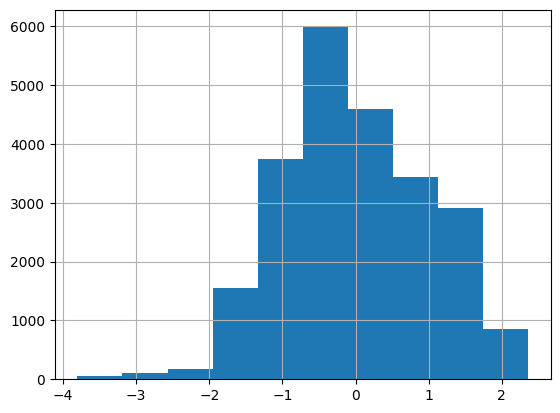

In [58]:
df['iC'].hist()

In [59]:
df.head()

,x_sex,y_sex,ra_in,dec_in,umag,gmag,imag,zmag,uerr,gerr,ierr,zerr,iCerr,ebv,background_g,ug0,gi0,iz0,main_type_encoded,iC
0,0.995489,0.696372,0.000252,0.622226,0.211651,0.501186,0.516862,0.413337,0.000510,0.036832,0.008387,0.000496,0.006224,0.189655,0.024417,0.047662,0.251099,0.574418,0,1.185079
1,0.992901,0.835542,0.000451,0.633242,0.131017,0.197048,0.236809,0.205241,0.000195,0.005525,0.001063,0.000035,0.000871,0.189655,0.024388,0.084403,0.372025,0.592095,7,-0.545766
2,0.990443,0.271943,0.000766,0.588635,0.122746,0.341667,0.424317,0.327025,0.000180,0.009208,0.002953,0.000151,0.002178,0.224138,0.024025,0.004590,0.208176,0.595855,6,0.725240
3,0.972255,0.642515,0.002276,0.617967,0.306479,0.758350,0.536903,0.372676,0.001620,0.073051,0.006497,0.000145,0.003656,0.206897,0.025157,0.052102,0.570233,0.622692,0,-1.110761
4,0.994071,0.058725,0.002431,0.500881,0.100173,0.201420,0.326019,0.270179,0.000135,0.008594,0.002835,0.000072,0.001539,0.241379,0.024775,0.040970,0.203619,0.587579,7,1.062202


In [60]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['main_type_encoded'], random_state=42)
# Separate X and y for training and testing
X_train = train_df.drop(columns=['main_type_encoded'])
y_train = train_df['main_type_encoded']
X_test = test_df.drop(columns=['main_type_encoded'])
y_test = test_df['main_type_encoded']

<Axes: >

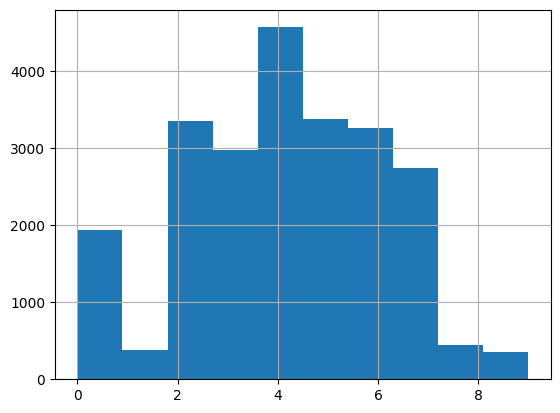

In [61]:
df['main_type_encoded'].hist()

<Axes: >

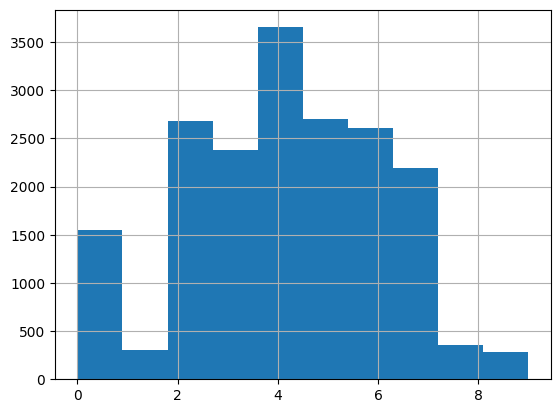

In [62]:
train_df['main_type_encoded'].hist()

<Axes: >

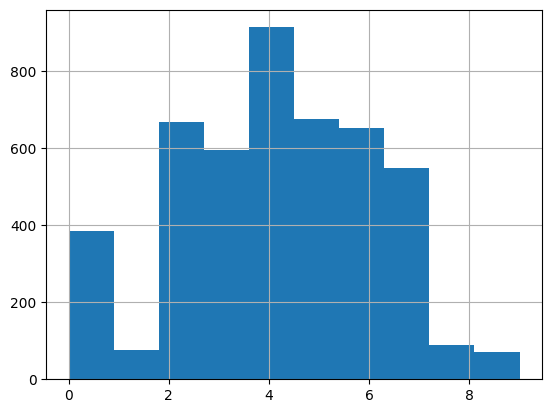

In [63]:
test_df['main_type_encoded'].hist()

In [64]:
train_df['main_type_encoded'].value_counts()/len(train_df['main_type_encoded'])

4    0.195203
5    0.144506
2    0.143010
6    0.139484
3    0.127357
7    0.117207
0    0.082536
8    0.019018
1    0.016347
9    0.015332
Name: main_type_encoded, dtype: float64

In [65]:
corr_matrix = train_df.corr()

In [66]:
corr_matrix['main_type_encoded'].sort_values(ascending=False)

main_type_encoded    1.000000
dec_in               0.087248
ra_in                0.049206
ebv                  0.025905
iCerr                0.010629
zerr                -0.009260
ierr                -0.014374
uerr                -0.016335
background_g        -0.023266
y_sex               -0.025178
x_sex               -0.026044
zmag                -0.036122
imag                -0.079627
iC                  -0.099980
gerr                -0.123410
ug0                 -0.249873
gmag                -0.277562
umag                -0.331843
iz0                 -0.346534
gi0                 -0.476508
Name: main_type_encoded, dtype: float64

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.29      0.39       386
           1       0.52      0.17      0.25        77
           2       0.71      0.66      0.68       669
           3       0.74      0.90      0.82       596
           4       0.77      0.89      0.83       914
           5       0.79      0.78      0.78       676
           6       0.76      0.89      0.82       653
           7       0.78      0.80      0.79       548
           8       0.64      0.44      0.52        89
           9       0.62      0.07      0.12        72

    accuracy                           0.75      4680
   macro avg       0.69      0.59      0.60      4680
weighted avg       0.74      0.75      0.73      4680

Label Mapping: {'Other': 0, "b'BClG'": 1, "b'Galaxy'": 2, "b'GinCl'": 3, "b'GlCl'": 4, "b'GlCl?_Candidate'": 5, "b'QSO'": 6, "b'Star'": 7, "b'WD*_Candidate'": 8, "b'X'": 9}
['Other', "b'BClG'", "b'Galaxy

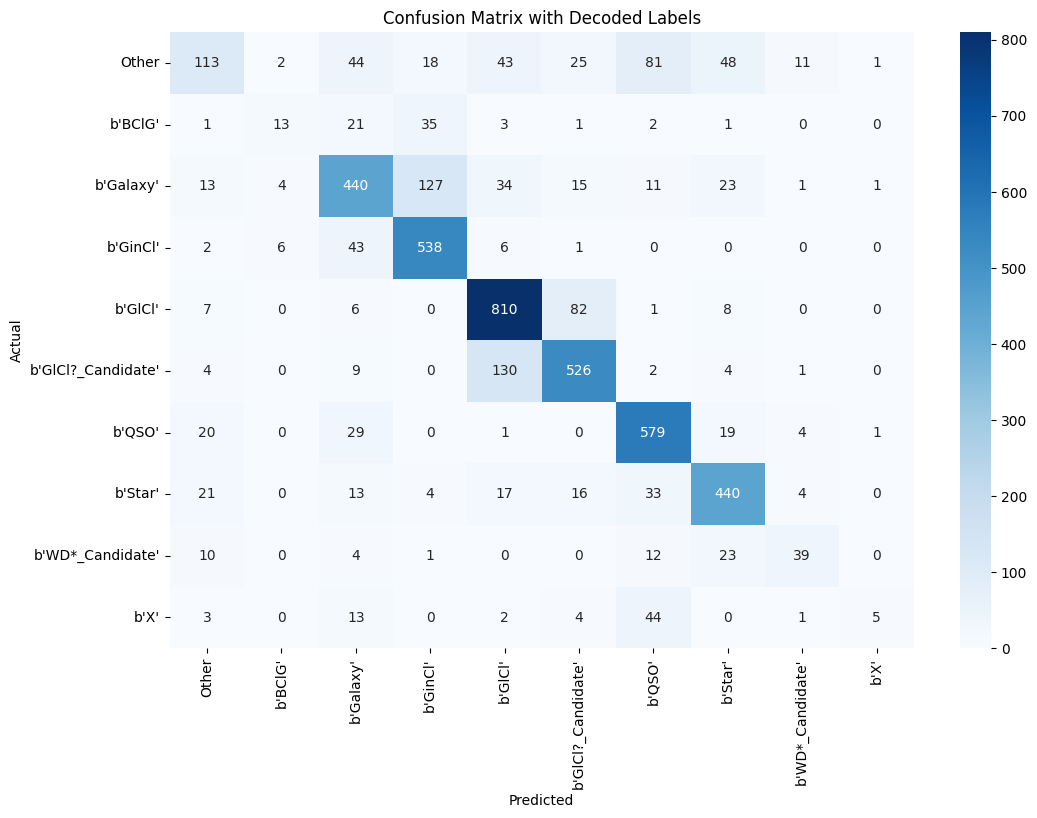

Model saved to random_forest_model_Modified.pkl


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Decode the labels using the dictionary
decoded_labels = [key for key in sorted(label_mapping, key=label_mapping.get)]
print(decoded_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()

# Save the trained model to a file
model_filename = 'random_forest_model_Modified.pkl'
joblib.dump(rf_classifier, model_filename)
print(f'Model saved to {model_filename}')

<Axes: >

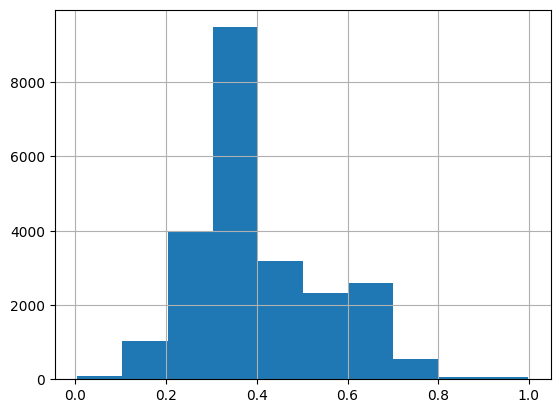

In [68]:
df['gi0'].hist()

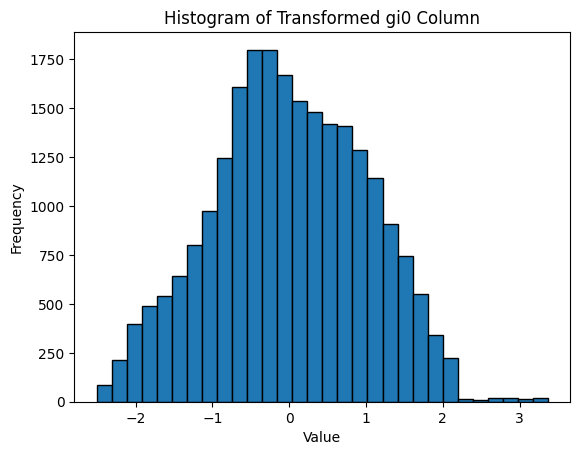

In [69]:
# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(df[['gi0']])  # Using double square brackets to keep it as a 2D array
labels = gmm.predict(df[['gi0']])
df['mode_label'] = labels

# Apply transformations to each mode separately
transformed_columns = []
for label in np.unique(labels):
    mode_data = df[df['mode_label'] == label]['gi0']
    
    # Apply a Box-Cox transformation (as an example)
    mode_data_transformed, _ = boxcox(mode_data - mode_data.min() + 1)  # Ensure positivity for Box-Cox
    
    # Normalize the transformed data to zero mean and unit variance
    mode_data_normalized = zscore(mode_data_transformed)
    
    # Store transformed and normalized data
    transformed_columns.append(pd.Series(mode_data_normalized, index=mode_data.index))

# Concatenate the transformed columns back into a single series
transformed_data = pd.concat(transformed_columns).sort_index()

# Plot the transformed data
plt.hist(transformed_data, bins=30, edgecolor='k')
plt.title('Histogram of Transformed gi0 Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Add the transformed data back to the DataFrame
df['transformed_gi0'] = transformed_data


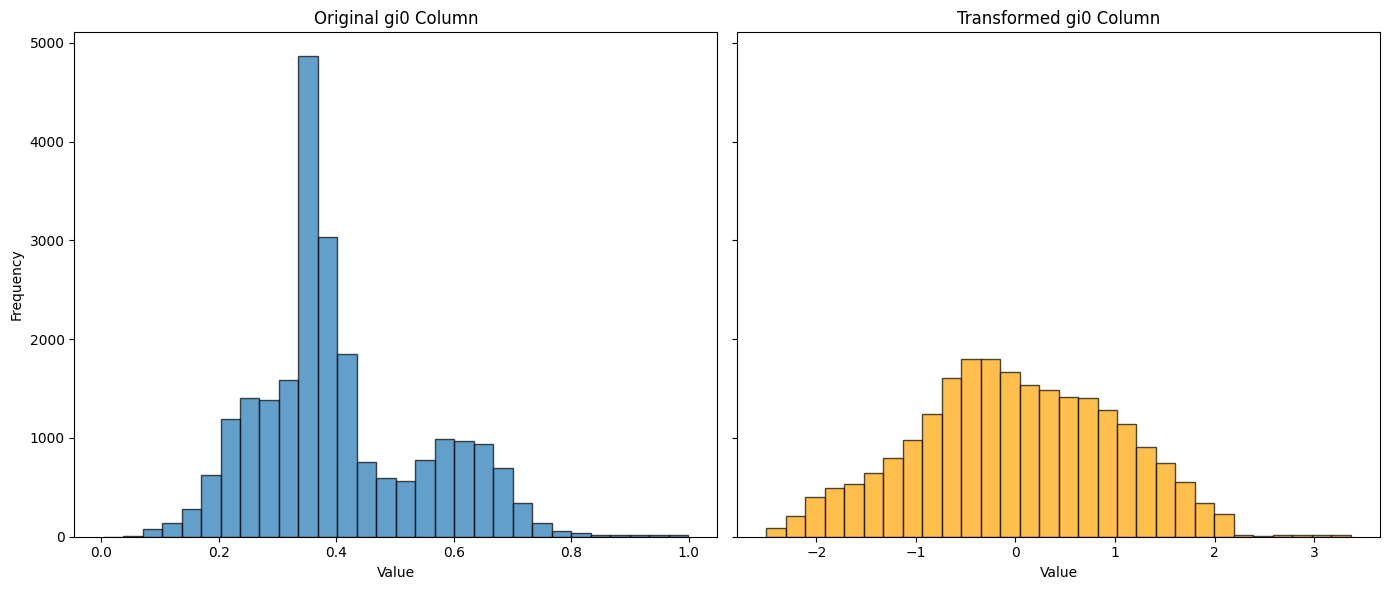

In [70]:
# Plot the original and transformed data histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Original column histogram
axes[0].hist(df['gi0'], bins=30, edgecolor='k', alpha=0.7)
axes[0].set_title('Original gi0 Column')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Transformed column histogram
axes[1].hist(df['transformed_gi0'], bins=30, edgecolor='k', alpha=0.7, color='orange')
axes[1].set_title('Transformed gi0 Column')
axes[1].set_xlabel('Value')

plt.tight_layout()
plt.show()

In [71]:
df = df.drop(columns=['gi0','mode_label'])
df['gi0'] = df['transformed_gi0']
df = df.drop(columns='transformed_gi0')

<Axes: >

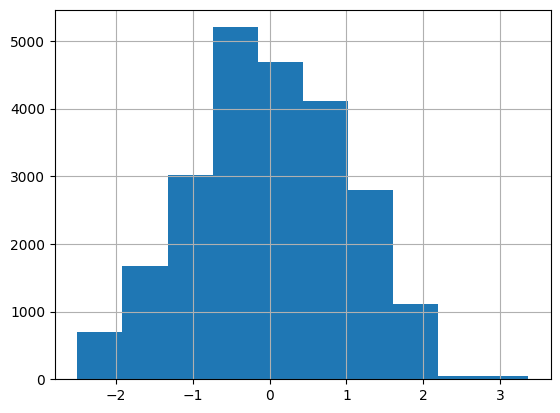

In [72]:
df['gi0'].hist()

In [73]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['main_type_encoded'], random_state=42)
# Separate X and y for training and testing
X_train = train_df.drop(columns=['main_type_encoded'])
y_train = train_df['main_type_encoded']
X_test = test_df.drop(columns=['main_type_encoded'])
y_test = test_df['main_type_encoded']

In [74]:
X_train.head()

,x_sex,y_sex,ra_in,dec_in,umag,gmag,imag,zmag,uerr,gerr,ierr,zerr,iCerr,ebv,background_g,ug0,iz0,iC,gi0
18330,0.787432,0.635970,0.683885,0.901159,0.100006,0.183877,0.289971,0.245104,0.000105,0.002455,0.000945,0.000032,0.000644,0.172414,0.024168,0.049326,0.588447,2.094651,0.249361
21591,0.406141,0.611936,0.799415,0.757050,0.246442,0.548344,0.400018,0.295213,0.000683,0.020872,0.002363,0.000057,0.001120,0.172414,0.024236,0.071779,0.609753,1.602886,-0.688199
14551,0.529273,0.304369,0.537875,0.449449,0.323956,0.816466,0.669263,0.492052,0.002843,0.086556,0.021973,0.000612,0.012961,0.465517,0.023812,0.046898,0.595132,0.672510,0.604098
4603,0.697559,0.908756,0.361566,0.071896,0.322021,0.582431,0.344995,0.238753,0.002790,0.022713,0.001418,0.000024,0.001075,0.189655,0.023937,0.156414,0.627093,-0.141862,1.127062
14206,0.631602,0.840880,0.529148,0.420954,0.055657,0.137032,0.251855,0.210271,0.000068,0.001842,0.000709,0.000021,0.000528,0.275862,0.024039,0.011989,0.596484,0.232102,0.444876


<Axes: >

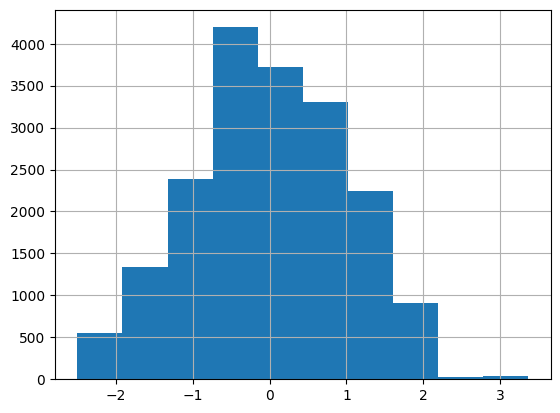

In [75]:
X_train['gi0'].hist()

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.31      0.41       386
           1       0.50      0.16      0.24        77
           2       0.71      0.65      0.68       669
           3       0.74      0.90      0.81       596
           4       0.77      0.89      0.83       914
           5       0.79      0.78      0.78       676
           6       0.74      0.87      0.80       653
           7       0.76      0.79      0.77       548
           8       0.67      0.47      0.55        89
           9       0.60      0.04      0.08        72

    accuracy                           0.74      4680
   macro avg       0.69      0.59      0.59      4680
weighted avg       0.73      0.74      0.73      4680

Label Mapping: {'Other': 0, "b'BClG'": 1, "b'Galaxy'": 2, "b'GinCl'": 3, "b'GlCl'": 4, "b'GlCl?_Candidate'": 5, "b'QSO'": 6, "b'Star'": 7, "b'WD*_Candidate'": 8, "b'X'": 9}
['Other', "b'BClG'", "b'Galaxy

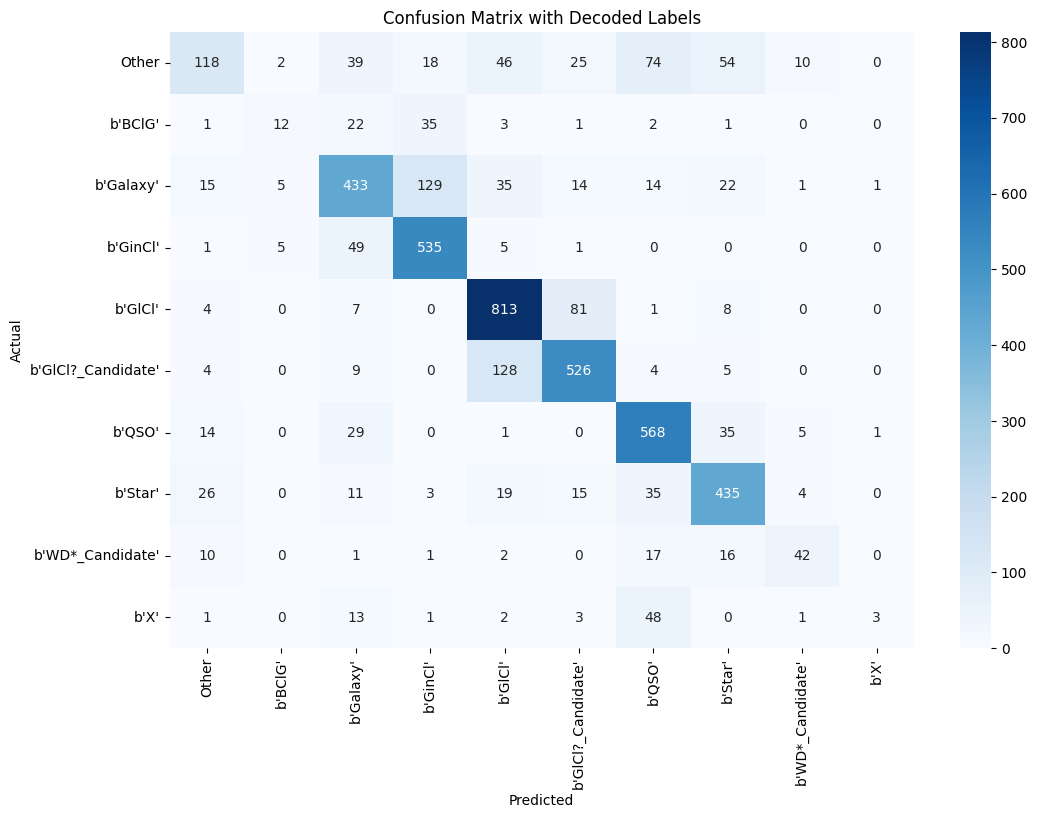

Model saved to second_random_forest_model_Modified.pkl


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Decode the labels using the dictionary
decoded_labels = [key for key in sorted(label_mapping, key=label_mapping.get)]
print(decoded_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()

# Save the trained model to a file
model_filename = 'second_random_forest_model_Modified.pkl'
joblib.dump(rf_classifier, model_filename)
print(f'Model saved to {model_filename}')

In [77]:
# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Other': 0, "b'BClG'": 1, "b'Galaxy'": 2, "b'GinCl'": 3, "b'GlCl'": 4, "b'GlCl?_Candidate'": 5, "b'QSO'": 6, "b'Star'": 7, "b'WD*_Candidate'": 8, "b'X'": 9}


Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.31      0.41       386
           1       0.50      0.16      0.24        77
           2       0.71      0.65      0.68       669
           3       0.74      0.90      0.81       596
           4       0.77      0.89      0.83       914
           5       0.79      0.78      0.78       676
           6       0.74      0.87      0.80       653
           7       0.76      0.79      0.77       548
           8       0.67      0.47      0.55        89
           9       0.60      0.04      0.08        72

    accuracy                           0.74      4680
   macro avg       0.69      0.59      0.59      4680
weighted avg       0.73      0.74      0.73      4680

Label Mapping: {'Other': 0, "b'BClG'": 1, "b'Galaxy'": 2, "b'GinCl'": 3, "b'GlCl'": 4, "b'GlCl?_Candidate'": 5, "b'QSO'": 6, "b'Star'": 7, "b'WD*_Candidate'": 8, "b'X'": 9}
['Other', "b'BClG'", "b'Galaxy

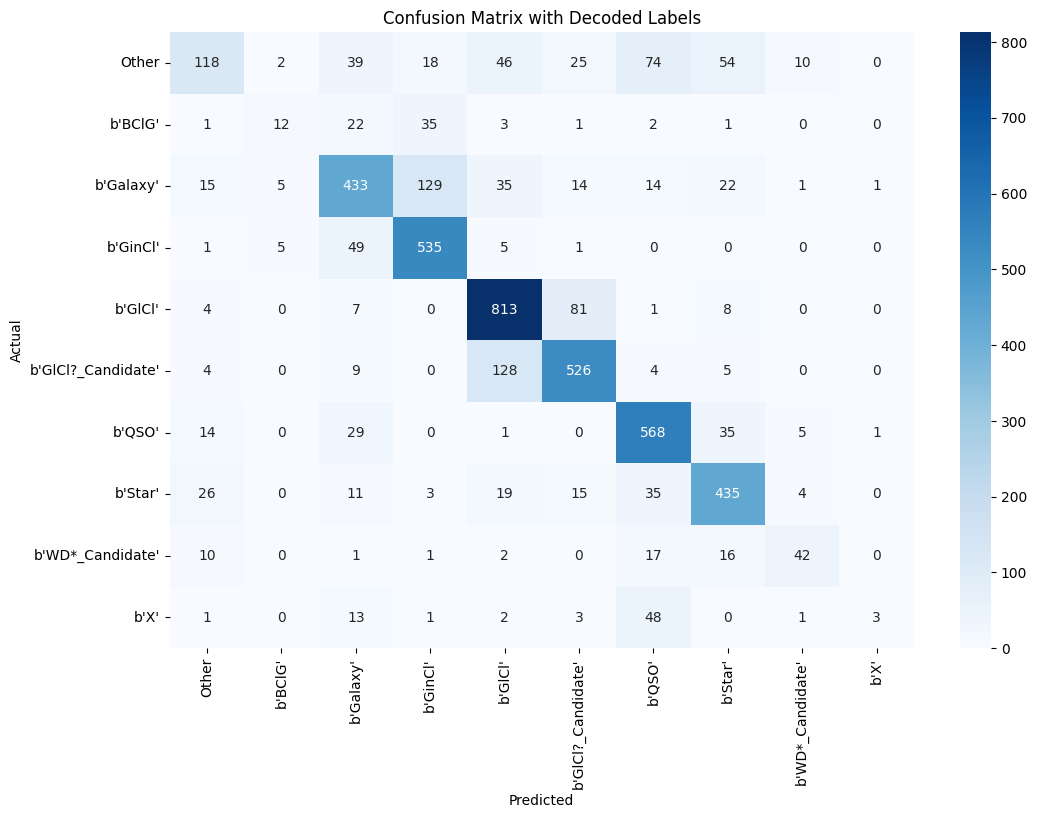

Model saved to second_random_forest_model_Modified.pkl


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Decode the labels using the dictionary
decoded_labels = [key for key in sorted(label_mapping, key=label_mapping.get)]
print(decoded_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Decoded Labels')
plt.show()

# Save the trained model to a file
model_filename = 'second_random_forest_model_Modified.pkl'
joblib.dump(rf_classifier, model_filename)
print(f'Model saved to {model_filename}')

In [79]:
X_train.head()

,x_sex,y_sex,ra_in,dec_in,umag,gmag,imag,zmag,uerr,gerr,ierr,zerr,iCerr,ebv,background_g,ug0,iz0,iC,gi0
18330,0.787432,0.635970,0.683885,0.901159,0.100006,0.183877,0.289971,0.245104,0.000105,0.002455,0.000945,0.000032,0.000644,0.172414,0.024168,0.049326,0.588447,2.094651,0.249361
21591,0.406141,0.611936,0.799415,0.757050,0.246442,0.548344,0.400018,0.295213,0.000683,0.020872,0.002363,0.000057,0.001120,0.172414,0.024236,0.071779,0.609753,1.602886,-0.688199
14551,0.529273,0.304369,0.537875,0.449449,0.323956,0.816466,0.669263,0.492052,0.002843,0.086556,0.021973,0.000612,0.012961,0.465517,0.023812,0.046898,0.595132,0.672510,0.604098
4603,0.697559,0.908756,0.361566,0.071896,0.322021,0.582431,0.344995,0.238753,0.002790,0.022713,0.001418,0.000024,0.001075,0.189655,0.023937,0.156414,0.627093,-0.141862,1.127062
14206,0.631602,0.840880,0.529148,0.420954,0.055657,0.137032,0.251855,0.210271,0.000068,0.001842,0.000709,0.000021,0.000528,0.275862,0.024039,0.011989,0.596484,0.232102,0.444876


In [80]:
y_train.head()

18330    6
21591    3
14551    7
4603     0
14206    6
Name: main_type_encoded, dtype: int64

In [81]:
X_test.head()

,x_sex,y_sex,ra_in,dec_in,umag,gmag,imag,zmag,uerr,gerr,ierr,zerr,iCerr,ebv,background_g,ug0,iz0,iC,gi0
15196,0.284195,0.679039,0.559271,0.691841,0.077204,0.058173,0.138675,0.137839,0.000082,0.001228,0.000236,0.000010,0.000268,0.362069,0.025619,0.077867,0.593069,-1.003225,-0.045682
20670,0.566502,0.077270,0.782531,0.502378,0.231688,0.479742,0.446384,0.339653,0.000623,0.015347,0.004135,0.000094,0.002901,0.206897,0.117096,0.084523,0.597855,0.243330,-0.296958
8411,0.535285,0.092520,0.454985,0.503175,0.261364,0.644347,0.648875,0.488550,0.000975,0.033149,0.017484,0.000644,0.011519,0.224138,0.023792,0.045936,0.586442,-0.470571,-0.991206
10952,0.077301,0.135746,0.494329,0.576695,0.257620,0.561359,0.502380,0.378181,0.000735,0.022713,0.005907,0.000147,0.002931,0.137931,0.024990,0.080646,0.597188,1.325967,-0.110080
23173,0.406745,0.179952,0.964727,0.652359,0.055459,0.065559,0.263912,0.228362,0.000075,0.001228,0.000709,0.000024,0.000563,0.310345,0.024658,0.045526,0.587515,0.232102,-1.765523
